In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tile = '12_-47'

# Taz 12_-47
# -	Macquarie Marshes [14,-35] where -350 TCV was decided.
# -	Arafura [3,-14]
# -	Kakadu [0,-13]
# -	Innamincka [8,-31]
# -	Sydney [17,-39]
# -	Chowilla [8,-38]


In [104]:
# Set folder location
mrvbf_folder = '/g/data/u46/wofs/confidence_albers/MrVBF/tiles/'
tc_folder = '/g/data/r78/datacube_stats/TCW_stats/demo_tiles/output/'

In [3]:
# Open into an xarray.DataArray
tcw = xr.open_rasterio(f'LS_TCW_PC_{tile}_1986_2020_summary.tif')
tcg = xr.open_rasterio(f'LS_TCG_PC_{tile}_1986_2020_summary.tif')
# tcb = xr.open_rasterio(f'{tc_folder}LS_TCB_PC_{tile}_1986_2020_summary.tif')
mrvbf = xr.open_dataset(f'mrvbf_{tile}.nc')

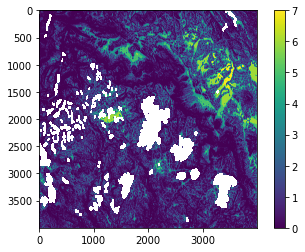

In [4]:
plt.imshow(mrvbf.band1.isel(time=0))
plt.colorbar()
# mrvbf.band1.isel(time=0).plot()

In [5]:
low = mrvbf.band1.isel(time=0) >= 3
high = mrvbf.band1.isel(time=0) < 3

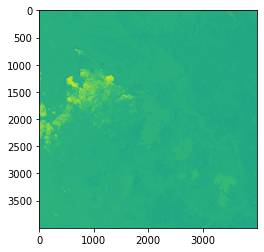

In [6]:
plt.imshow(tcw.isel(band=3))

In [7]:
# Apply wetness threshold
wet = tcw.isel(band=3)>-600

# Apply greenness threshold - binary
green_high = tcg.isel(band=1)>1000
green_low = tcg.isel(band=1)>1400

# Mask greenness by mrvbf - binary + nan
green_high_mrvbf = green_high.where(high == 1)
green_low_mrvbf = green_low.where(low == 1)

# Combine into one greenness mask
green_combo = np.nansum(np.dstack((green_high_mrvbf, green_low_mrvbf)),2)

# Mask wet by greennnes mask
wet_masked = wet.where(green_combo != 1)

# # Mask tcw by each greenness mask
# wet_masked_high = wet.where(green_high_mrvbf!=1)
# wet_masked_low = wet.where(green_low_mrvbf!=1)

# # Combine masked tcw
# wet_masked_combined = wet_masked_high + wet_masked_low

In [8]:
np.unique(green_combo)

array([0., 1.])

array([ 0.,  1., nan, ..., nan, nan, nan])

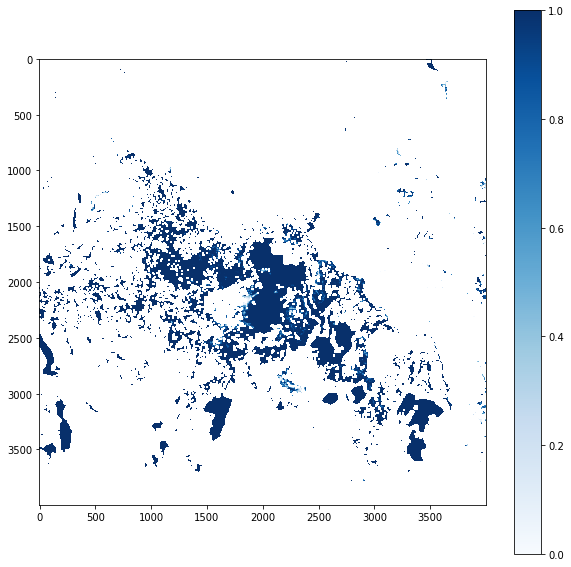

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(wet_masked,cmap='Blues')
plt.colorbar()

np.unique(wet_masked)

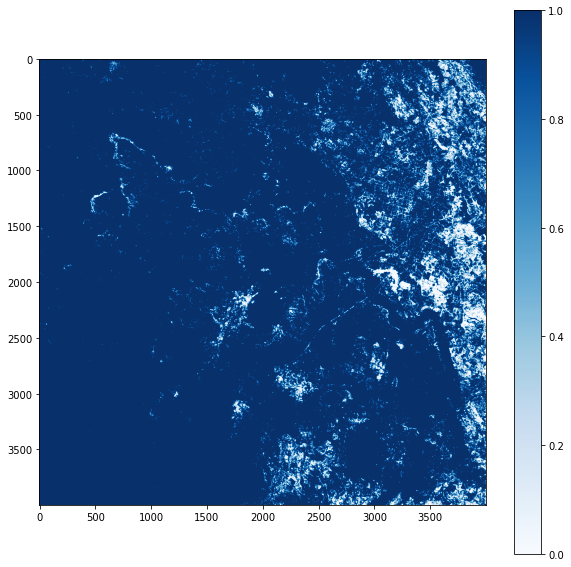

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(wet,cmap='Blues')
plt.colorbar()

In [11]:
# # Set up subplots
# f, axarr = plt.subplots(2, 3, figsize=(13, 11))
# bands=['nbart_red', 'nbart_green', 'nbart_blue']

# mrvbf.band1.plot(cmap='RdBu', vmin=0, vmax=9,add_colorbar=False, ax=axarr[0, 0])
# axarr[0, 0].set_title('MrVBF')

# green_high.plot(cmap='RdBu', add_colorbar=False, ax=axarr[0, 1])
# axarr[0, 1].set_title('green_high')

# green_low.plot(cmap='RdBu', add_colorbar=False, ax=axarr[0, 1])
# axarr[0, 2].set_title('green_low')

# wet.plot(cmap='RdBu',add_colorbar=False, ax=axarr[1, 0])
# axarr[1, 0].set_title('TCW > -600')

# green_high_mrvbf.plot(cmap='RdBu', add_colorbar=False, ax=axarr[1,1])
# axarr[1, 1].set_title('green_high_mrvbf')

# green_low_mrvbf.plot(cmap='RdBu', add_colorbar=False, ax=axarr[1, 1])
# axarr[1, 2].set_title('green_low_mrvbf')


In [12]:
wet_masked

<xarray.DataArray (y: 4000, x: 4000)>
array([[nan, nan, nan, ...,  1.,  1., nan],
       [nan, nan, nan, ...,  1.,  1., nan],
       [ 1., nan, nan, ..., nan, nan,  1.],
       ...,
       [nan, nan, nan, ...,  1., nan, nan],
       [nan, nan, nan, ...,  1., nan, nan],
       [nan, nan, nan, ...,  1., nan, nan]])
Coordinates:
    band     int64 4
  * y        (y) float64 -4.6e+06 -4.6e+06 -4.6e+06 ... -4.7e+06 -4.7e+06
  * x        (x) float64 1.2e+06 1.2e+06 1.2e+06 ... 1.3e+06 1.3e+06 1.3e+06

In [13]:


# fig, ax = plt.subplots(figsize=(6, 1))
# fig.subplots_adjust(bottom=0.5)

# cmap = wet_masked.ListedColormap(['red', 'green', 'blue', 'cyan'])
# cmap.set_over('0.25')
# cmap.set_under('0.75')

# bounds = [1, 2, 4, 7, 8]
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cb2 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
#                                 norm=norm,
#                                 boundaries=[0] + bounds + [13],
#                                 extend='both',
#                                 ticks=bounds,
#                                 spacing='proportional',
#                                 orientation='horizontal')
# cb2.set_label('Discrete intervals, some other units')
# fig.show()


### RGB of area

In [ ]:
tile = '0_-13'
# Define funciton to get tile bounds
def get_tile_bounds(tile):
    x, y = tile.split('_')
    minx = int(x) * 100000
    miny = int(y) * 100000
    maxx = minx + 100000
    maxy = miny + 100000
    return {'minx': minx, 'miny': miny, 'maxx': maxx, 'maxy': maxy}
bounds = get_tile_bounds(tile)
x=(bounds['minx'],bounds['maxx'])
y=(bounds['miny'],bounds['maxy'])
crs = "EPSG:3577"
output_crs = "EPSG:3577"